In [15]:
import gzip
from pathlib import Path
import numpy as np


def read_gzip(labels_path: Path, images_path: Path):
    with gzip.open(labels_path, "rb") as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)
    with gzip.open(images_path, "rb") as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(
            len(labels), 28 * 28
        )
    return labels, images


path = Path("..") / "data" / "fashion-mnist"
labels, images = read_gzip(
    path / "train-labels-idx1-ubyte.gz", path / "train-images-idx3-ubyte.gz"
)
test_labels, test_images = read_gzip(
    path / "t10k-labels-idx1-ubyte.gz", path / "t10k-images-idx3-ubyte.gz"
)

<AxesSubplot:ylabel='count'>

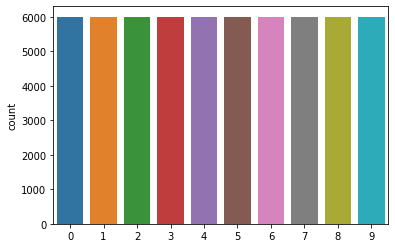

In [16]:
import seaborn as sns

sns.countplot(x=labels)

<AxesSubplot:ylabel='count'>

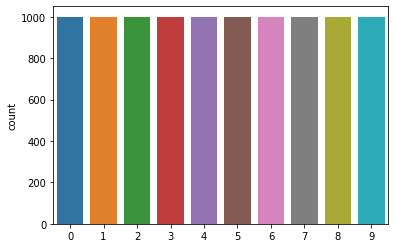

In [17]:
sns.countplot(x=test_labels)

In [18]:
import pandas as pd

transformed_labels = np.where(pd.Series(labels).isin([5, 7, 9]), 1, 0).astype(np.uint8)
transformed_test_labels = np.where(pd.Series(test_labels).isin([5, 7, 9]), 1, 0).astype(
    np.uint8
)

<AxesSubplot:ylabel='count'>

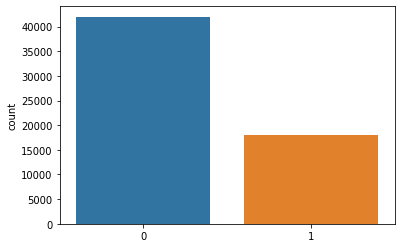

In [19]:
sns.countplot(x=transformed_labels)

<AxesSubplot:ylabel='count'>

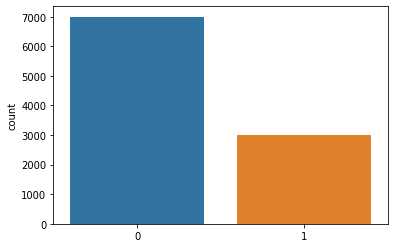

In [20]:
sns.countplot(x=transformed_test_labels)

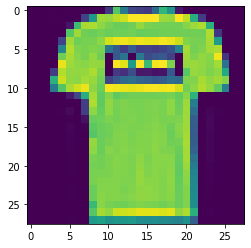

In [21]:
import matplotlib.pyplot as plt

plt.imshow(images[1].reshape(28, 28))

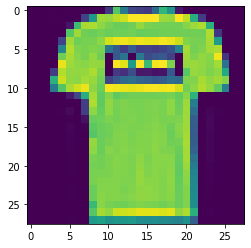

In [22]:
images = images.reshape(-1, 28, 28)
test_images = test_images.reshape(-1, 28, 28)
plt.imshow(images[1])

In [23]:
from sklearn.model_selection import train_test_split

(
    train_images,
    val_images,
    train_labels,
    val_labels,
    train_tlabels,
    val_tlabels,
) = train_test_split(
    images,
    labels,
    transformed_labels,
    test_size=0.3,
    random_state=42,
    stratify=np.concatenate(
        (np.expand_dims(labels, axis=1), np.expand_dims(transformed_labels, axis=1)),
        axis=1,
    ),
)

Check class distribution

<AxesSubplot:ylabel='count'>

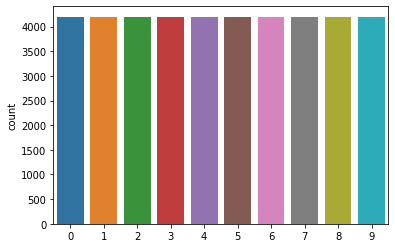

In [24]:
sns.countplot(x=train_labels)

<AxesSubplot:ylabel='count'>

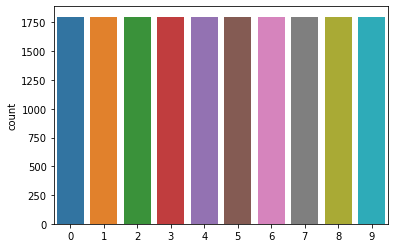

In [25]:
sns.countplot(x=val_labels)

<AxesSubplot:ylabel='count'>

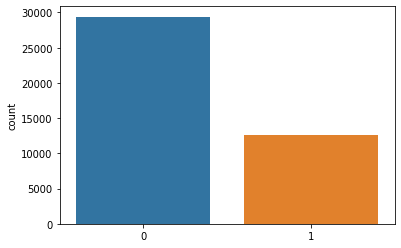

In [26]:
sns.countplot(x=train_tlabels)

<AxesSubplot:ylabel='count'>

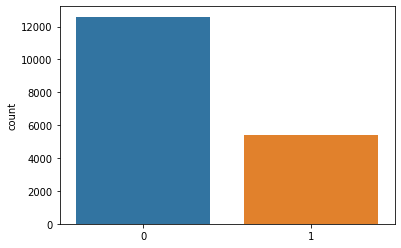

In [27]:
sns.countplot(x=val_tlabels)